# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
#import pydotplus
#import graphviz
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']))

In [4]:
data = df2.copy()
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [6]:
data.shape

(45211, 17)

In [7]:
# Data type of each features
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

10 features have object type and 7 are numbers

As per given data we know that 10 features are of object type, so lets convert the type as category.

In [8]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [9]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [10]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Check the presence of missing values

In [11]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [13]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [14]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [18]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [19]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [20]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [21]:
data['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [22]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [24]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [25]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [26]:
data['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [27]:
data['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [28]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [29]:
data['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [30]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

# Five Point Summary

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Outliers are present in age,balance,duration,campaign,pdays,previous

# Distribution of numerical columns

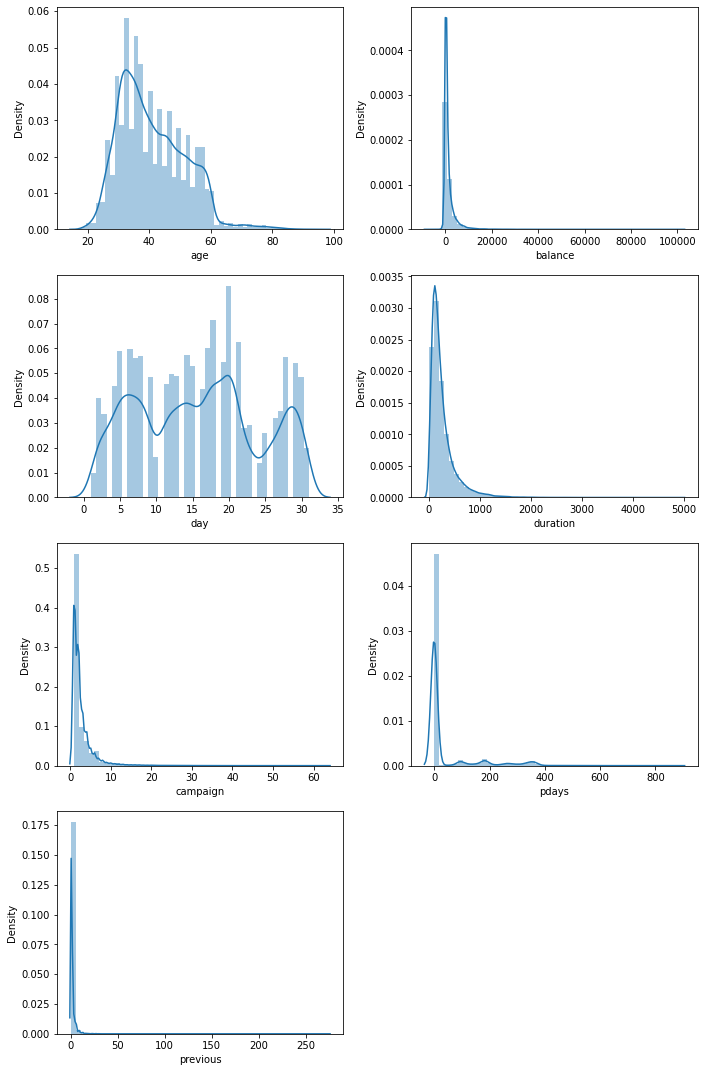

In [32]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe = axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Distribution of categorical feature

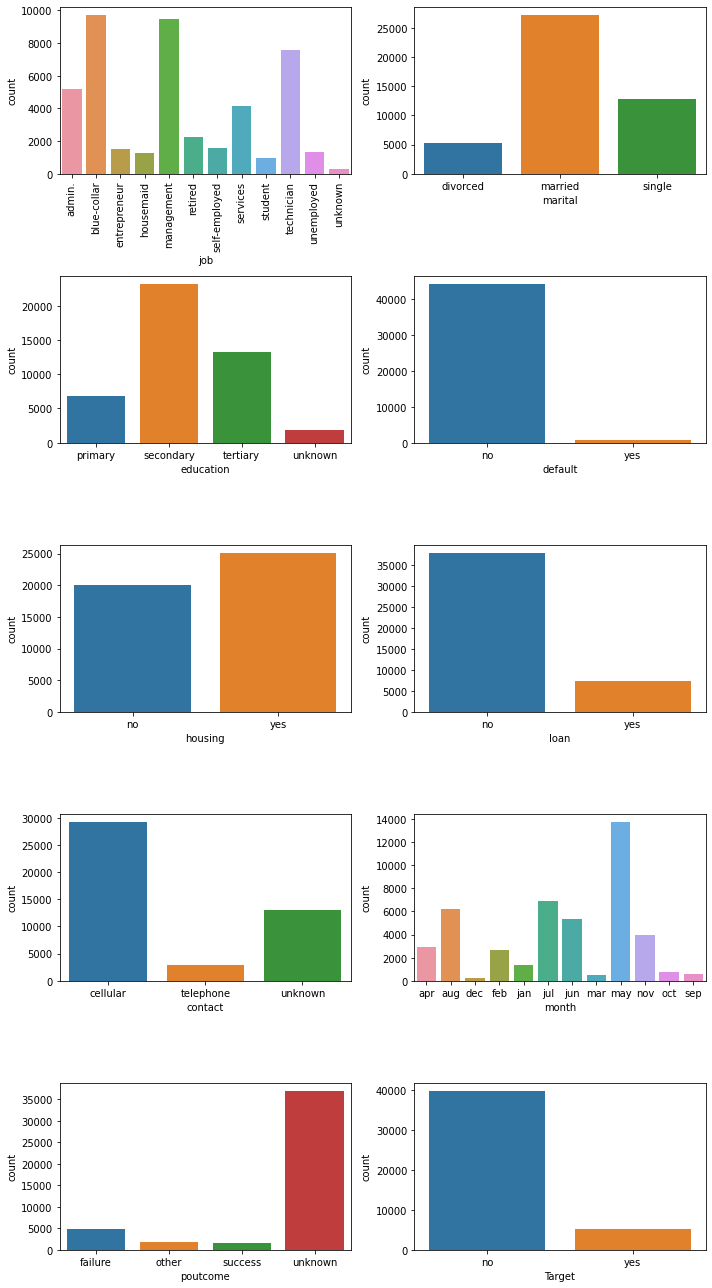

In [33]:
fig, axe = plt.subplots(nrows=5,ncols=2,figsize=(10,18))
axe = axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
#plt.setp(plt.get_figlabels,rotation=90)
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()

# Inferences from the count plot of categorical features-

1. More than 90% customers have no default credit

2. 88% customers have not subscribed for term deposit

3. Most customers have been contacted in may month

4. Most customers have been contacted by cellular network

5. Number of customers who have housing loan is more than the number of customers who don't have housing loan

6. Around 6% customers have credit in default

# Measure of skewness of numerical features

In [34]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


# Checking the presence of Outliers

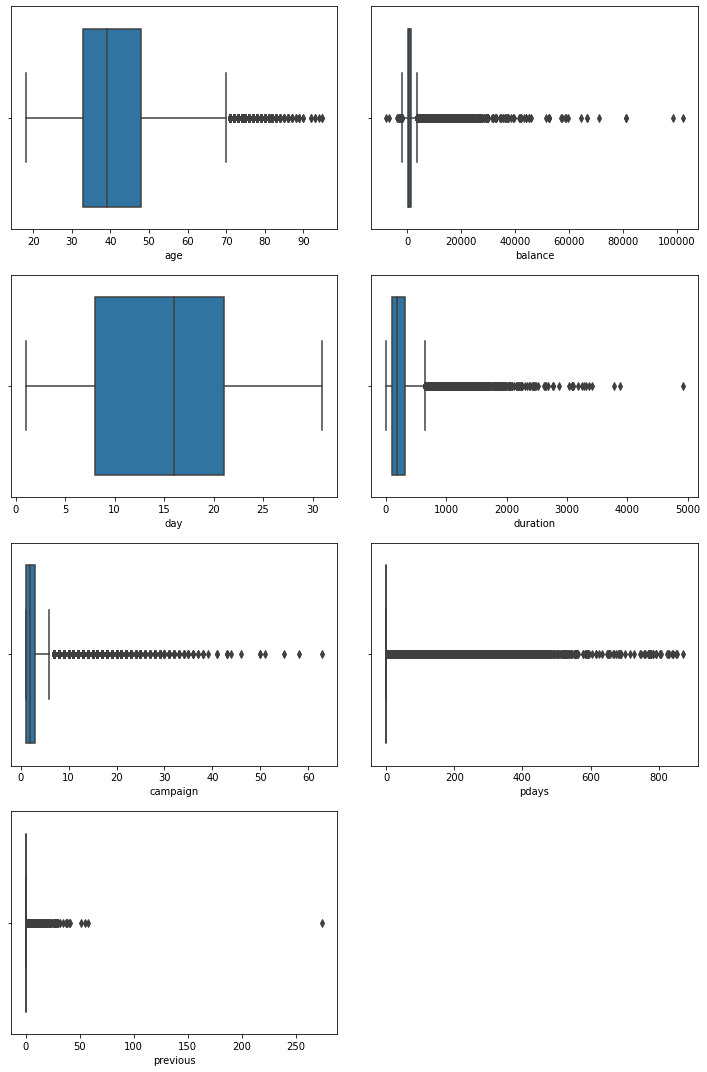

In [35]:
fig, axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe = axe.flatten()

sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(x='previous',data=data,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

We have outliers in all the features except in day

In [36]:
data['Target'].value_counts().to_frame('Target feature distribution')

,Target feature distribution
no,39922
yes,5289


In [37]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [38]:
# except job and contact make all the features numeric
df = data.copy()
encoder = LabelEncoder()
df['default'] = encoder.fit_transform(df['default']).astype(int)
df['marital'] = encoder.fit_transform(df['marital']).astype(int)
df['loan'] = encoder.fit_transform(df['loan']).astype(int)
df['housing'] = encoder.fit_transform(df['housing']).astype(int)
df['Target'] = encoder.fit_transform(df['Target']).astype(int)
df['month'] = encoder.fit_transform(df['month']).astype(int)
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype(int)
df['education'] = encoder.fit_transform(df['education']).astype(int)

df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  Target     45211 non-null  int64   
dtypes: category(2), int64(15)
memory usage: 5.3 MB


In [41]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


converted into number based category

# Handling Outliers with mean replacement

In [45]:
# Removing values greater than 75 percent
meanbal = float(df['balance'].mean())
df['balance'] = np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

In [46]:
meandur = float(df['duration'].mean())
df['duration'] = np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])

In [48]:
meancam = float(df['campaign'].mean())
df['campaign'] = np.where(df['campaign']>np.percentile(df['campaign'],75),meancam,df['campaign'])

In [54]:
meanpd = float(df['pdays'].mean())
df['pdays'] = np.where(df['pdays']>np.percentile(df['pdays'],75),meanpd,df['pdays'])

In [55]:
meanpr = float(df['previous'].mean())
df['previous'] = np.where(df['previous']>np.percentile(df['previous'],75),meanpr,df['previous'])

# After Removing Outliers

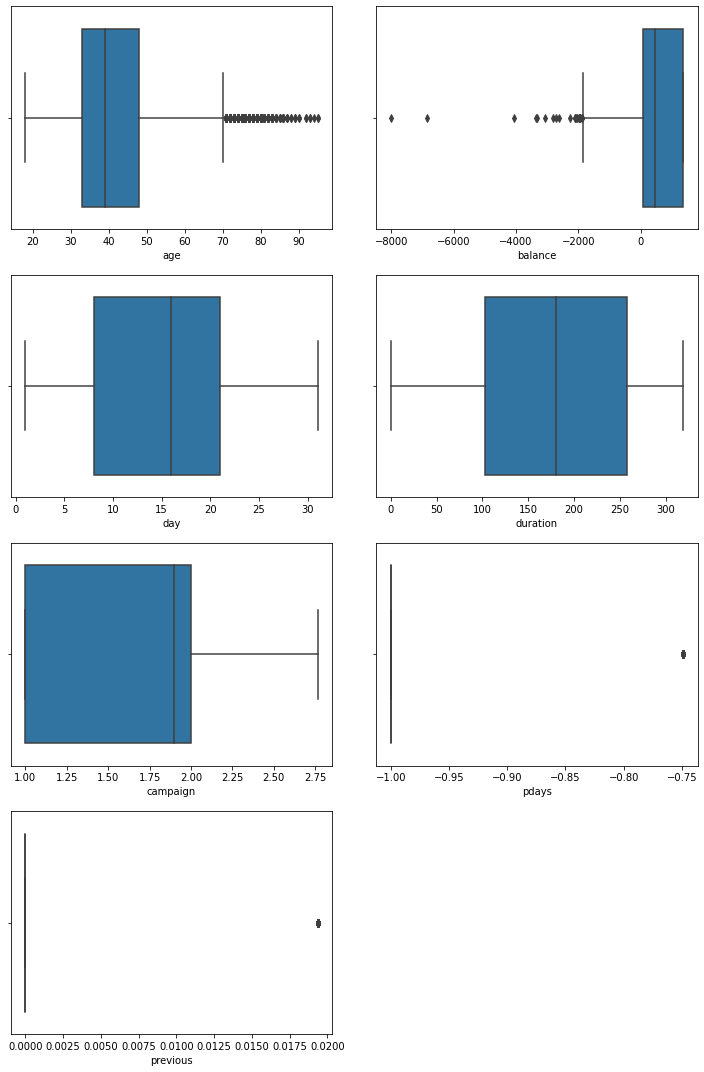

In [58]:
fig, axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe = axe.flatten()

sns.boxplot(x='age',data=df,ax=axe[0])
sns.boxplot(x='balance',data=df,ax=axe[1])
sns.boxplot(x='day',data=df,ax=axe[2])
sns.boxplot(x='duration',data=df,ax=axe[3])
sns.boxplot(x='campaign',data=df,ax=axe[4])
sns.boxplot(x='pdays',data=df,ax=axe[5])
sns.boxplot(x='previous',data=df,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# Corr Plot of all features

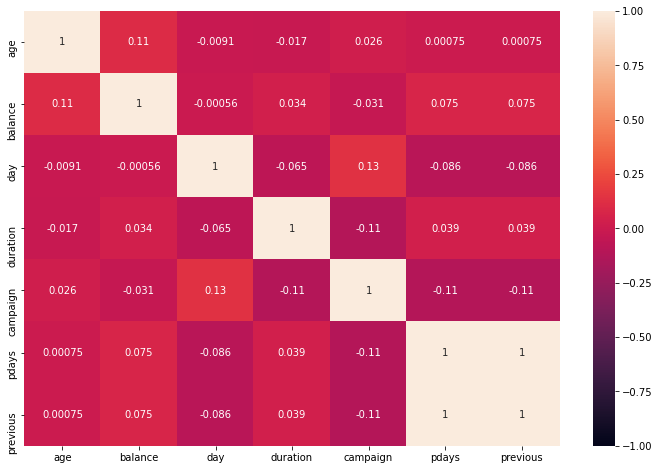

In [59]:
# corr after removing outliers
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

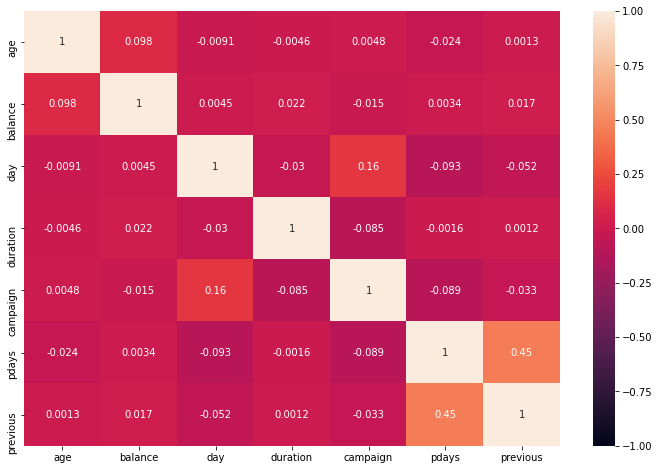

In [60]:
# corr with outliers
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [61]:
df2 = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       45211 non-null  int64   
 1   marital   45211 non-null  category
 2   default   45211 non-null  category
 3   balance   45211 non-null  float64 
 4   housing   45211 non-null  category
 5   loan      45211 non-null  category
 6   campaign  45211 non-null  float64 
 7   previous  45211 non-null  float64 
 8   poutcome  45211 non-null  category
 9   Target    45211 non-null  category
dtypes: category(6), float64(3), int64(1)
memory usage: 1.6 MB


In [64]:
#Ordering the Categorical features to remove the following error while plotting the pairplot:
#TypeError: Categorical is not ordered for operation min
#you can use .as_ordered() to change the Categorical to an ordered one
df2['marital'] = df2['marital'].cat.as_ordered()
df2['default'] = df2['default'].cat.as_ordered()
df2['housing'] = df2['housing'].cat.as_ordered()
df2['loan'] = df2['loan'].cat.as_ordered()
df2['poutcome'] = df2['poutcome'].cat.as_ordered()
df2['Target'] = df2['Target'].cat.as_ordered()

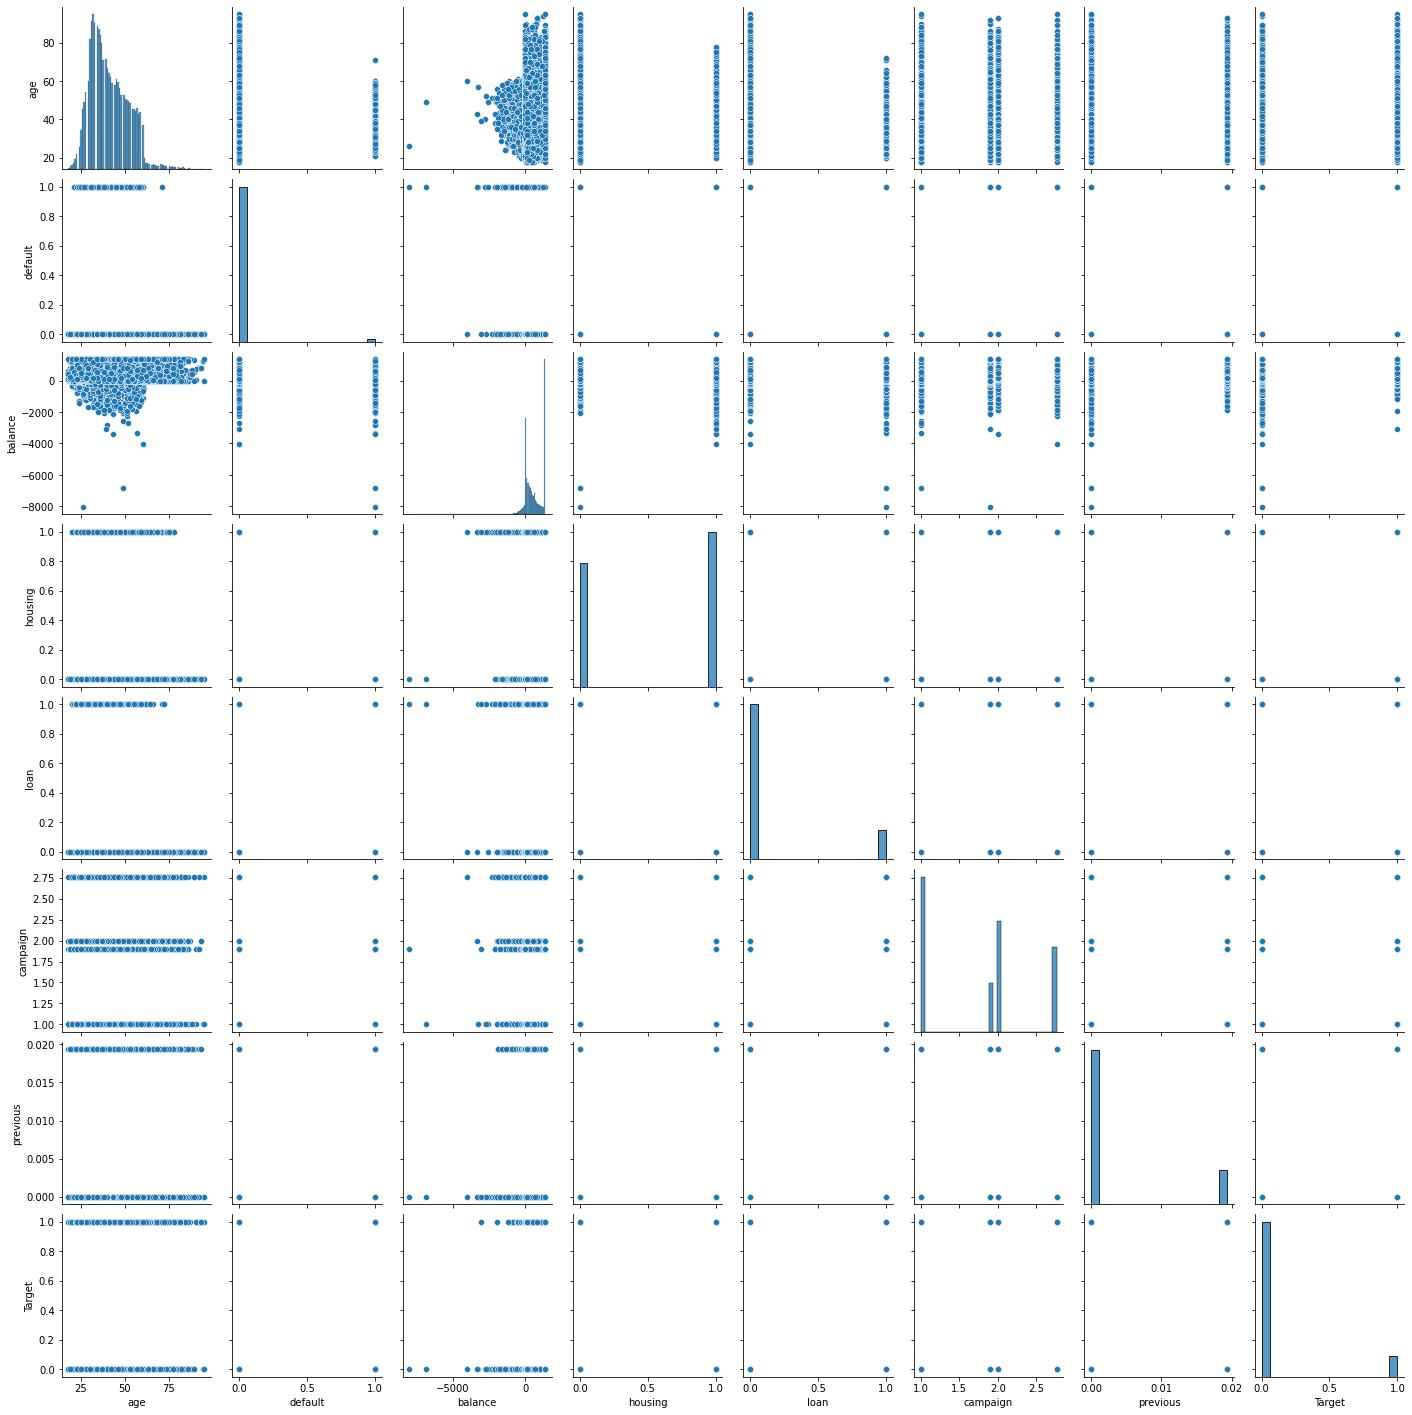

In [65]:
sns.pairplot(df2)

# Train Test Split (70:30)

In [66]:
X = df2.drop('Target',axis=1)
y = df2['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

# Scaling of columns

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Models

## Logistic Regression Model

In [69]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(X_train_scaled,y_train)
y_pred = logic_r.predict(X_test_scaled)
LR_accuracy = accuracy_score(y_test,y_pred)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*40)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy))
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11897   116]
 [ 1310   241]]
----------------------------------------
Accuracy of Logistic Regression :0.89
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

***************************************************************


## Naive Bayes Model

In [70]:
NB = GaussianNB()
NB.fit(X_train_scaled,y_train)
y_pred = NB.predict(X_test_scaled)
NB_accuracy = accuracy_score(y_test,y_pred)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*30)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('*'*63)

***************************************************************
Confusion Matrix
 [[10756  1257]
 [ 1033   518]]
------------------------------
Accuracy of Naive Bayes :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     12013
           1       0.29      0.33      0.31      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.61     13564
weighted avg       0.84      0.83      0.84     13564

***************************************************************


## KNN Model

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)
KNN_accuracy = accuracy_score(y_test,y_pred)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('-'*30)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_pred))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11526   487]
 [ 1211   340]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.41      0.22      0.29      1551

    accuracy                           0.87     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.87      0.86     13564

***************************************************************


optimal k is 13


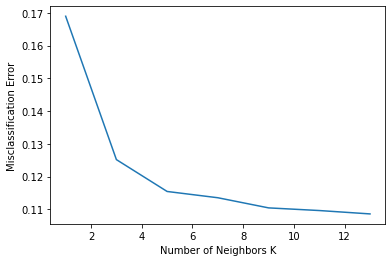

In [72]:
oddList = list(np.arange(1,15))
neighbors = list(filter(lambda x: x % 2 != 0, oddList))

accuracy_list = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_s = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy_s)
    
MSE=[1 - j for j in accuracy_list]

optimal = neighbors[MSE.index(min(MSE))]
print('optimal k is',optimal)

plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## SVC Model

In [73]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
predicted_svc = svc.predict(X_test_scaled)
SVC_accuracy = accuracy_score(y_test,predicted_svc)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc))
print('-'*30)
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11870   143]
 [ 1270   281]]
------------------------------
Accuracy of SVC : 0.8958271896195813
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564

***************************************************************


# Ensemble Models

## Decision Tree

In [74]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
predicted_DT = dTree.predict(X_test)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT))
print('-'*30)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11005  1008]
 [ 1191   360]]
------------------------------
Accuracy of Decision Tree :0.84
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.26      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.57      0.58     13564
weighted avg       0.83      0.84      0.83     13564

***************************************************************


## Feature importance test for decision tree

In [75]:
xvar = df2.drop('Target', axis=1)
feature_cols = xvar.columns 
feat_importance = dTree.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.430396
age,0.259675
poutcome,0.093077
campaign,0.088872
marital,0.041790
previous,0.034401
loan,0.025214
housing,0.022674
default,0.003902


## Pruning of Decision Tree

In [76]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
predicted_DTR = dTreeR.predict(X_test)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR))
print('-'*30)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11826   187]
 [ 1237   314]]
------------------------------
Accuracy of Decision Tree with Regularization:0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564

***************************************************************


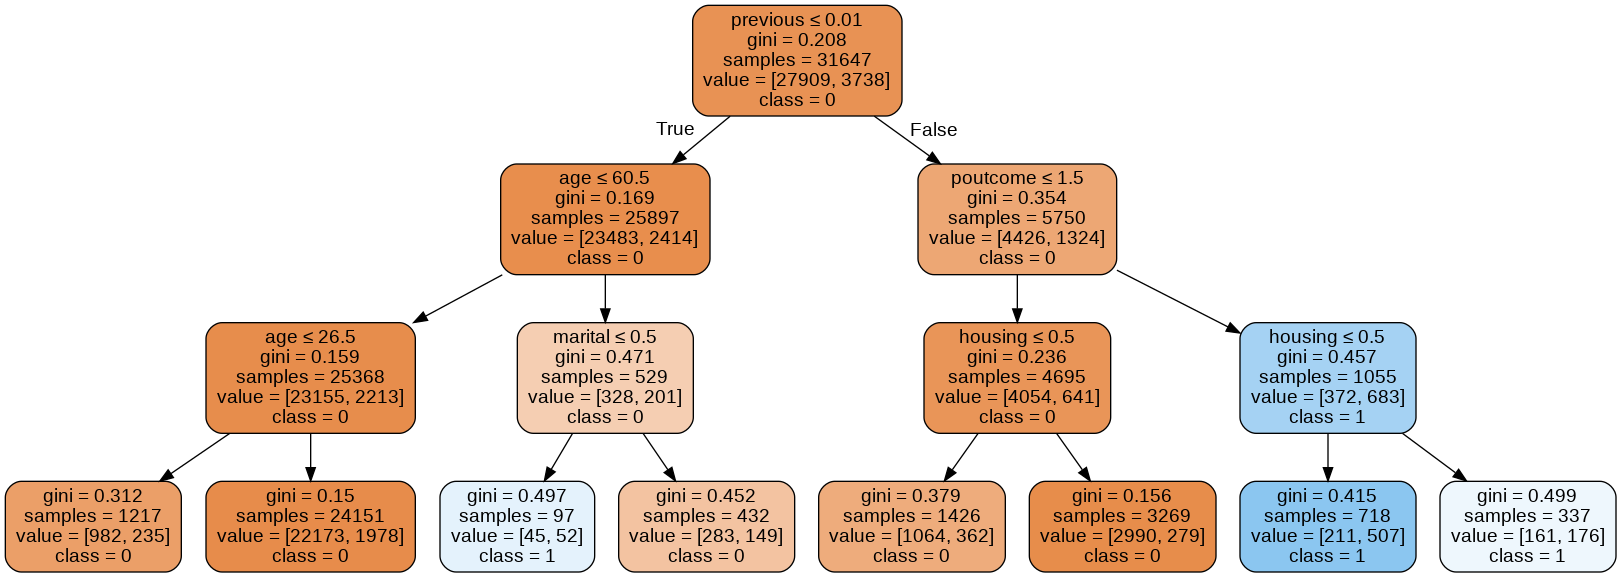

In [77]:
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(dTreeR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT.png')
Image(graph.create_png())

In [78]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


## Bagging

In [79]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1)
bagc = bagc.fit(X_train, y_train)
predicted_BAG = bagc.predict(X_test)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG))
print('-'*30)
print('Accuracy of BaggingClassifier :{:.2f}'.format(BAG_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11616   397]
 [ 1224   327]]
------------------------------
Accuracy of BaggingClassifier :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

***************************************************************


## Adaptive Boosting

In [81]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA))
print('-'*30)
print('Accuracy of AdaBoostClassifier :{:.2f}'.format(ADA_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA))

***************************************************************
Confusion Matrix
 [[11888   125]
 [ 1305   246]]
------------------------------
Accuracy of AdaBoostClassifier :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



## Gradient boosting

In [82]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD))
print('-'*30)
print('Accuracy of GradientBoostingClassifier :{:.2f}'.format(GRAD_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11881   132]
 [ 1304   247]]
------------------------------
Accuracy of GradientBoostingClassifier :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

***************************************************************


## Random Forest

In [83]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train)
predicted_RAN = randf.predict(X_test)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN ))
print('-'*30)
print('Accuracy of RAN :{:.2f}'.format(RAN_accuracy))
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN ))
print('*'*63)

***************************************************************
Confusion Matrix
 [[11588   425]
 [ 1224   327]]
------------------------------
Accuracy of RAN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.43      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

***************************************************************


In [84]:
#n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5)
randf = randf.fit(X_train, y_train)
predicted_RANN = randf.predict(X_test)
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('\033[1m''*'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN))
print('-'*30)
print('Accuracy of RAN :{:.2f}'.format(RANN_accuracy)) 
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RANN)) 
print('*'*63)

***************************************************************
Confusion Matrix
 [[11608   405]
 [ 1222   329]]
------------------------------
Accuracy of RAN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

***************************************************************


# Models with accuracy scores

In [86]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy),
      ('Random Forest N=500',RANN_accuracy)]
Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895827
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
7,Adaptive Boosting,0.894574
8,Gradient Boosting,0.894132
6,Bagging,0.880492
10,Random Forest N=500,0.880050
9,Random Forest N=100,0.878428
1,KNN,0.874816
4,Decision Tree,0.837880


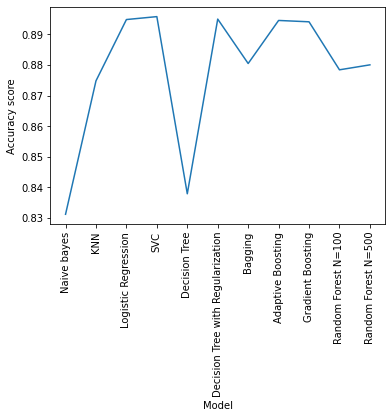

In [87]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False)
plt.xticks(rotation=90)
plt.show()

# Conclusion:
## Comments on dataset:
* The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models. 
* The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models. 
* Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
* This situation could have been avoided if the datset was balanced. 
* Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.

## Comments on  Models:
* SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
* The Outliers did not affect much on accuracy scores of all models.
* In Decision Trees, Gradient boosting method always performed better for this dataset.
* While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.